<div class="markdown-google-sans">

## **LAB 2**
</div>


In [ ]:
# Method 1: Using requests library (recommended)
import requests
import os

# Create directory if it doesn't exist
os.makedirs("./lab_2", exist_ok=True)

# Download image
url = "https://media.formula1.com/image/upload/c_lfill,w_3392/q_auto/v1740000000/content/dam/fom-website/manual/Misc/2022manual/2022SummerBreak/GettyImages-1385059611.webp"
response = requests.get(url)

# Save to file
with open("./image.jpg", "wb") as f:
    f.write(response.content)
    
print("Image downloaded successfully!")

Image downloaded successfully!


<div class="markdown-google-sans">

## **3.1 Image classification**
</div>


No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use mps:0


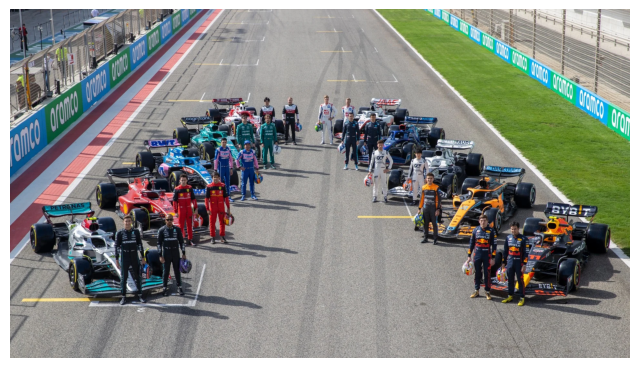


Classification Results:
racer, race car, racing car: 0.0895
motor scooter, scooter: 0.0712
moped: 0.0687
tractor: 0.0647
crash helmet: 0.0569


In [ ]:
from transformers import pipeline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Create the image classification pipeline with explicit model
clf = pipeline(
    "image-classification", 
    model="google/vit-base-patch16-224", 
    revision="3f49326",
    use_fast=True  # Use fast image processor (recommended)
)

# Use the downloaded image
image_path = "./image.jpg"

# Display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Get classification results
results = clf(image_path)

# Display results
print("\nClassification Results:")
for result in results:
    print(f"{result['label']}: {result['score']:.4f}")



<div class="markdown-google-sans">

## **3.2 Visual question answering**
</div>


In [6]:
from PIL import Image
from transformers import pipeline

vqa_pipeline = pipeline(
    "visual-question-answering", 
    model="dandelin/vilt-b32-finetuned-vqa", 
    revision="d0a1f6a",
    use_fast=True  # Use fast image processor (recommended)
)

image =  Image.open("./image.jpg")
question = "Is there a tiger?"

vqa_pipeline(image, question, top_k=1)
#[{'score': 0.9998154044151306, 'answer': 'yes'}]


Device set to use mps:0


[{'score': 0.7287536859512329, 'answer': 'no'}]

<div class="markdown-google-sans">

## **3.3 Image to text**
</div>



In [2]:
from transformers import pipeline

captioner = pipeline(
    "image-to-text", 
    model="Salesforce/blip-image-captioning-base",
    revision="main",  # Use the main branch (correct revision)
    use_fast=True  # Use fast image processor (recommended)
)
captioner("https://huggingface.co/datasets/Narsil/image_dummy/resolve/main/parrots.png")
## [{'generated_text': 'two birds are standing next to each other '}]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use mps:0


[{'generated_text': 'two birds are standing next to each other birds'}]

<div class="markdown-google-sans">

## **3.4 Object detection**
</div>



In [8]:
model = pipeline("object-detection")

model("./cat.webp")

# [{'label': 'blanket',
#  'mask': mask_string,
#  'score': 0.917},
#...]


No model was supplied, defaulted to facebook/detr-resnet-50 and revision 1d5f47b (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


ImportError: 
DetrConvEncoder requires the timm library but it was not found in your environment. You can install it with pip:
`pip install timm`. Please note that you may need to restart your runtime after installation.


In [ ]:
# Accessing individual elements
# Format: array[layer, row, column]
print("=== ACCESSING INDIVIDUAL ELEMENTS ===")
print(f"Element at [0, 0, 0]: {arr_3d[0, 0, 0]}")  # First element (value: 1)
print(f"Element at [0, 0, 1]: {arr_3d[0, 0, 1]}")  # Second element (value: 2)
print(f"Element at [0, 1, 0]: {arr_3d[0, 1, 0]}")  # Third element (value: 3)
print(f"Element at [1, 1, 1]: {arr_3d[1, 1, 1]}")  # Last element (value: 8)

print("\n=== DIFFERENT INDEXING METHODS ===")
print(f"Using separate brackets: arr_3d[0][1][0] = {arr_3d[0][1][0]}")
print(f"Using tuple indexing: arr_3d[(1, 0, 1)] = {arr_3d[(1, 0, 1)]}")

print("\n=== NEGATIVE INDEXING ===")
print(f"Last layer, last row, last column: arr_3d[-1, -1, -1] = {arr_3d[-1, -1, -1]}")


In [ ]:
# Accessing slices
print("=== ACCESSING SLICES ===")

print("1. Get entire layers:")
print("First layer [0, :, :]:")
print(arr_3d[0, :, :])
print("\nSecond layer [1, :, :]:")
print(arr_3d[1, :, :])

print("\n2. Get specific rows across all layers:")
print("First row of all layers [:, 0, :]:")
print(arr_3d[:, 0, :])
print("Second row of all layers [:, 1, :]:")
print(arr_3d[:, 1, :])

print("\n3. Get specific columns across all layers:")
print("First column of all layers [:, :, 0]:")
print(arr_3d[:, :, 0])
print("Second column of all layers [:, :, 1]:")
print(arr_3d[:, :, 1])

print("\n4. Mixed slicing:")
print("First layer, all rows, first column [0, :, 0]:")
print(arr_3d[0, :, 0])
print("All layers, first row, second column [:, 0, 1]:")
print(arr_3d[:, 0, 1])

print("\n5. Using ranges:")
print("Elements from both layers, first row [0:2, 0, :]:")
print(arr_3d[0:2, 0, :])  # Same as [:, 0, :]


In [ ]:
# Additional useful operations with 3D arrays
print("=== ADDITIONAL OPERATIONS ===")

print("1. Array properties:")
print(f"Shape: {arr_3d.shape}")
print(f"Size (total elements): {arr_3d.size}")
print(f"Number of dimensions: {arr_3d.ndim}")
print(f"Data type: {arr_3d.dtype}")

print("\n2. Reshaping:")
# Flatten to 1D
print("Flattened array:", arr_3d.flatten())

# Reshape to different dimensions (must have same total elements)
print("Reshaped to (4, 2):")
print(arr_3d.reshape(4, 2))

print("\n3. Mathematical operations:")
print("Sum of all elements:", np.sum(arr_3d))
print("Sum along axis 0 (layers):", np.sum(arr_3d, axis=0))
print("Sum along axis 1 (rows):", np.sum(arr_3d, axis=1))
print("Sum along axis 2 (columns):", np.sum(arr_3d, axis=2))

print("\n4. Boolean indexing:")
print("Elements greater than 4:")
print(arr_3d[arr_3d > 4])

print("\n5. Alternative ways to create 3D arrays:")
# Using arange and reshape
arr_alt = np.arange(8).reshape(2, 2, 2)
print("Using arange(8).reshape(2, 2, 2):")
print(arr_alt)

# Using zeros, ones, or random values
print("Array of zeros with shape (2, 2, 2):")
print(np.zeros((2, 2, 2)))

print("Array of random integers:")
print(np.random.randint(1, 10, size=(2, 2, 2)))
